In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [4]:
train = pd.read_csv('./train.csv')

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
survival = train.Survived.sum()
n_survival = train.shape[0] - survival

In [12]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train.Embarked = train.Embarked.fillna('S')

In [16]:
train.Age = train.Age.fillna(train.Age.median())

In [17]:
# 분할된 개별 리스트를 바로 데이터 프레임으로 만드려면, expand=True옵션을 추가한다.
# ( ) : 그루핑. 검색 결과의 특정 부분만 출력한다.
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [18]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 
                                        'Officer')
train['Title'] = train['Title'].replace(['Jonkheer','Master'], 'Master')
train['Title'] = train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady',
                                        'Dona', 'Royalty'])
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')


In [19]:
y=train.Survived

In [20]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train['AgeGroup'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

---

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

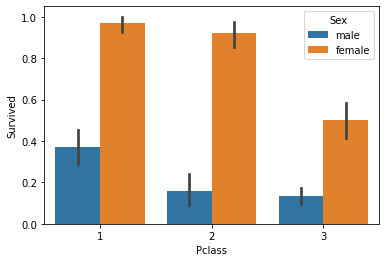

In [21]:
# hue : 카테고리형 데이터 분별할 때 (hue로 그룹화가 된다.)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

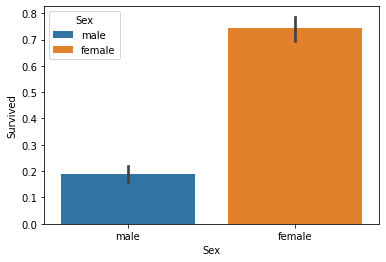

In [22]:
# dodge는 누적 bar 그래프를 만든다.
sns.barplot(x=train['Sex'], y=train['Survived'], hue=train['Sex'], dodge=False)

<AxesSubplot:>

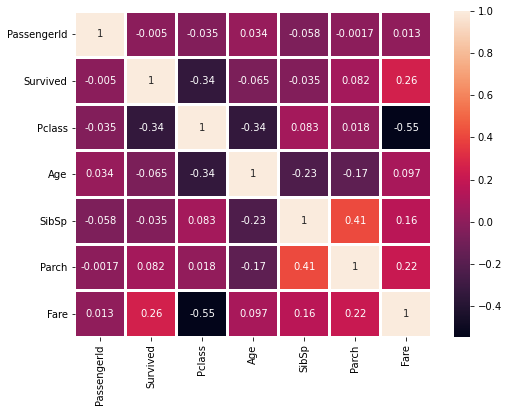

In [23]:
# annot : 셀 안에 숫자를 출력해주는 것
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, linewidths=2)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

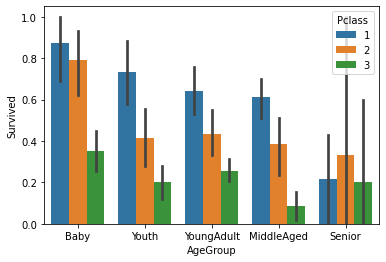

In [24]:
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

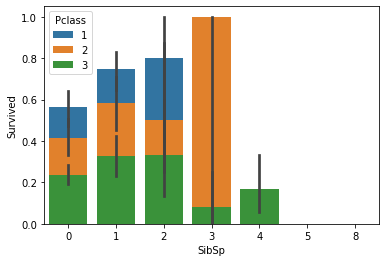

In [25]:
sns.barplot(x='SibSp', y='Survived', hue='Pclass', data=train, dodge=False)

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeGroup'],
      dtype='object')

In [27]:
train = train.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1)

In [28]:
# LabelEncoder : 카테고리형 데이터를 수치형으로 변환하기
# astype : 모든 열의 데이터 타입을 변경
train['Sex'].dtypes
train['Sex'].astype(str)

label = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title', 'AgeGroup']:
    train[col] = label.fit_transform(train[col])

In [29]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeGroup
0,1,0,3,1,22.0,7.2500,2,3,4
1,2,1,1,0,38.0,71.2833,0,4,1
2,3,1,3,0,26.0,7.9250,2,2,3
3,4,1,1,0,35.0,53.1000,2,4,3
4,5,0,3,1,35.0,8.0500,2,3,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,2,5,3
887,888,1,1,0,19.0,30.0000,2,2,4
888,889,0,3,0,28.0,23.4500,2,2,3
889,890,1,1,1,26.0,30.0000,0,3,3


In [77]:
test = pd.read_csv('./test.csv')

In [31]:
n1_survival = test.shape[0] - survival

In [78]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
test['AgeGroup'] = pd.cut(test['Age'], bins=bin, labels=group_names)
test['AgeGroup'].value_counts()

MiddleAged    94
Youth         88
YoungAdult    85
Baby          54
Senior        11
Name: AgeGroup, dtype: int64

In [80]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [33]:
test = test.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1)

In [34]:
test['Sex'].dtypes
test['Sex'].astype(str)

label = LabelEncoder()
for col in ['Sex', 'Embarked','AgeGroup']:
    test[col] = label.fit_transform(test[col])

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Title', 'AgeGroup'],
      dtype='object')

In [36]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'AgeGroup'], dtype='object')

In [63]:
X_train = train[['Pclass', 'Fare', 'Embarked',
 'Title', 'AgeGroup']]
Y_train = train['Survived']

In [64]:
X_test = test[['Pclass', 'Fare', 'Embarked','AgeGroup']]

In [72]:
X_test['Fare'].fillna(0, inplace=True)

C:\Users\poeun\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [66]:
X_train.corr()

,Pclass,Fare,Embarked,Title,AgeGroup
Pclass,1.000000,-0.549500,0.162098,-0.150121,0.115052
Fare,-0.549500,1.000000,-0.224719,-0.020232,-0.090001
Embarked,0.162098,-0.224719,1.000000,0.016108,0.006983
Title,-0.150121,-0.020232,0.016108,1.000000,0.177773
AgeGroup,0.115052,-0.090001,0.006983,0.177773,1.000000


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Fare      418 non-null    float64
 2   Embarked  418 non-null    int32  
 3   AgeGroup  418 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 9.9 KB


In [76]:
X_test.corr()

,Pclass,Fare,Embarked,AgeGroup
Pclass,1.000000,-0.577673,0.227983,0.285803
Fare,-0.577673,1.000000,-0.257977,-0.243739
Embarked,0.227983,-0.257977,1.000000,-0.007057
AgeGroup,0.285803,-0.243739,-0.007057,1.000000


In [75]:
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 4))

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model=KNeighborsClassifier() 
model.fit(X_train, Y_train)
pred=model.predict(X_test)

ValueError: query data dimension must match training data dimension

In [ ]:
# Logistic Regression
lr = LogisticRegression()